In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing_extensions import TypedDict
from IPython.display import display, Image

In [5]:
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str
        
llm = ChatOllama(base_url="http://localhost:11434", model="qwen2.5:7b")
        
def call_llm_1(state: State):
    
    msg = llm.invoke(f"请用以下主题讲一个有趣的笑话: {state["topic"]}")
    return {"joke": msg.content}

def call_llm_2(state: State):
    
    msg = llm.invoke(f"请用以下主题讲一小段段故事, 字数不超过150字: {state["topic"]}")
    return {"story": msg.content}

def call_llm_3(state: State):
    
    msg = llm.invoke(f"请用以下主题写一篇七绝诗句: {state["topic"]}")
    return {"poem": msg.content}


def aggregator(state: State):
    
    output = f"这里有一个故事、笑话、诗句，是关于：【{state["topic"]}】\n\n"
    output += f"STORY: \n {state["story"]} \n\n"
    output += f"JOKE: \n {state["joke"]} \n\n"
    output += f"POEM: \n {state["poem"]} \n\n"
    return {"combined_output": output}



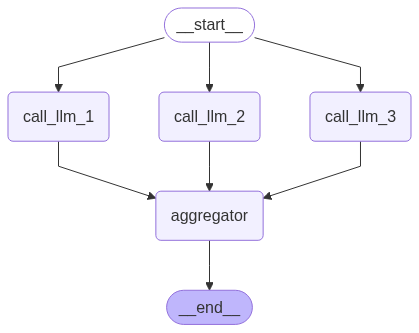

In [6]:
parallel_workflow = StateGraph(State)

parallel_workflow.add_node("call_llm_1", call_llm_1)
parallel_workflow.add_node("call_llm_2", call_llm_2)
parallel_workflow.add_node("call_llm_3", call_llm_3)
parallel_workflow.add_node("aggregator", aggregator)

parallel_workflow.add_edge(START, "call_llm_1")
parallel_workflow.add_edge(START, "call_llm_2")
parallel_workflow.add_edge(START, "call_llm_3")

parallel_workflow.add_edge("call_llm_1", "aggregator")
parallel_workflow.add_edge("call_llm_2", "aggregator")
parallel_workflow.add_edge("call_llm_3", "aggregator")

parallel_workflow.add_edge("aggregator", END)

chain = parallel_workflow.compile()

display(Image(chain.get_graph().draw_mermaid_png()))

In [7]:
# Invoke
state = chain.invoke({"topic": "猫咪"})
state["combined_output"]

'这里有一个故事、笑话、诗句，是关于：【猫咪】\n\nSTORY: \n 在一个宁静的小巷里，住着一只名叫米粒的猫咪。它有着一身柔软的白毛和一双闪亮的绿色眼睛。每天傍晚，当夕阳洒满小巷，米粒就会悠闲地在石板路上走动。今天，它遇到了一个独自玩耍的孩子——小明。两人一见如故，米粒用轻柔的脚步引导着小明，在古老的巷弄间探险。他们发现了许多新奇的小秘密：隐藏在老墙间的花朵、躲在角落里的蝴蝶。夕阳西下时，母猫温柔地召唤米粒回家，小明依依不舍地与它告别。从此以后，每天傍晚，总能看到米粒和小明并肩漫步的身影。 \n\nJOKE: \n 当然可以！这里有一个关于猫咪的有趣笑话，希望你会喜欢：\n\n有一天，一只猫走在街上，突然停下来对旁边的一只狗说：“你知道吗？我听说地球其实是一个大大的球体。”\n\n狗好奇地问：“那又怎样呢？”\n\n猫得意地说：“这意味着——如果我们从高处跳下来，应该可以再次落到地面！”\n\n狗听完后一脸严肃地回答：“哦，那你们为什么不试试呢？”\n\n猫眨了眨眼，说：“试是会试的。但是你知道吗，这并不是一个好主意。因为如果我掉了下去，你可能会看到一只满身都是尘土和毛发的球体；而如果你跳下去……”\n\n说到这里，猫意味深长地看了一眼狗，然后继续它悠闲的步伐，留下一脸迷茫的狗独自思考。\n\n这个笑话里巧妙地利用了“地球是圆的”这一科学事实，并结合猫咪的生活习性来制造了一个幽默的情景。希望你喜欢！ \n\nPOEM: \n 猫咪轻步月光中，\n影细悄探露华浓。\n玲珑小眼藏幽意，\n夜静声息梦亦同。 \n\n'